In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)



In [3]:
class XOR_NN_Activated(nn.Module):
    def __init__(self):
        super(XOR_NN_Activated, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.activation = nn.Tanh()
        self.final_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.final_activation(self.output(x))
        return x

class XOR_NN_NoActivation(nn.Module):
    def __init__(self):
        super(XOR_NN_NoActivation, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        return x


In [4]:
def train_model(model, epochs=5000, lr=0.1):
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(torch.sigmoid(y_pred), y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve for {'Activated' if isinstance(model, XOR_NN_Activated) else 'No Activation'} XOR Neural Network")
    plt.show()


Training XOR_NN_Activated:
Epoch 0, Loss: 0.7067
Epoch 500, Loss: 0.6974
Epoch 1000, Loss: 0.6943
Epoch 1500, Loss: 0.6900
Epoch 2000, Loss: 0.6711
Epoch 2500, Loss: 0.6298
Epoch 3000, Loss: 0.6129
Epoch 3500, Loss: 0.6070
Epoch 4000, Loss: 0.6043
Epoch 4500, Loss: 0.6027


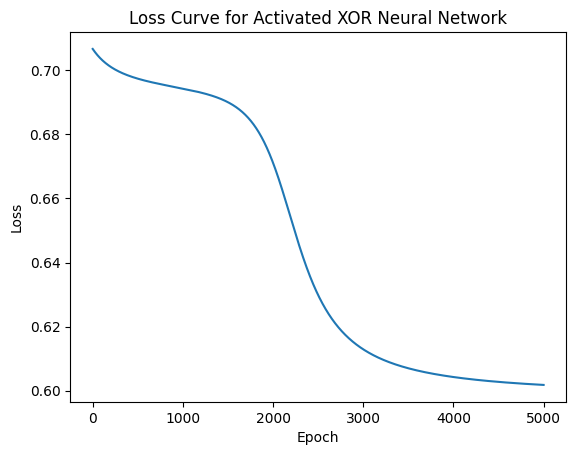

Training XOR_NN_NoActivation:
Epoch 0, Loss: 0.6966
Epoch 500, Loss: 0.6933
Epoch 1000, Loss: 0.6932
Epoch 1500, Loss: 0.6932
Epoch 2000, Loss: 0.6931
Epoch 2500, Loss: 0.6931
Epoch 3000, Loss: 0.6931
Epoch 3500, Loss: 0.6931
Epoch 4000, Loss: 0.6931
Epoch 4500, Loss: 0.6931


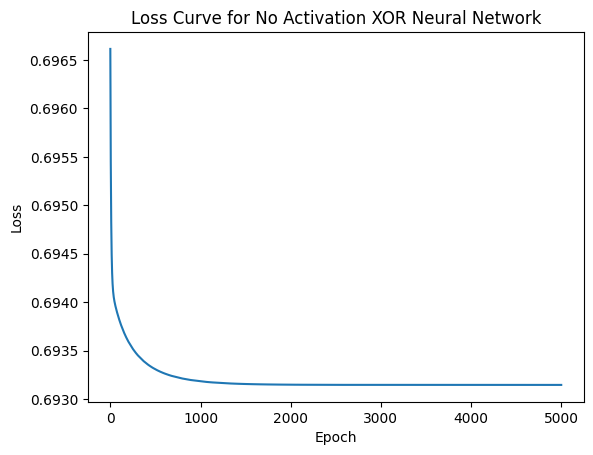

In [5]:
print("Training XOR_NN_Activated:")
model_activated = XOR_NN_Activated()
train_model(model_activated)

print("Training XOR_NN_NoActivation:")
model_no_activation = XOR_NN_NoActivation()
train_model(model_no_activation)